# Importing Necessary Libraries

In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Dataset

In [238]:
df = pd.read_csv('bank-full.csv')
print(df)  # prints all the data

       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pd

In [240]:
df.head()  # prints limited column data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Checking the Address

In [243]:
import os
print(os.getcwd())  # returns the address where the executed file is located

C:\Users\PMLS


# Basic Data Overview

In [246]:
df.info()  # provides summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# Investigating the Duplication

In [248]:
df.duplicated()  # checks the duplicated rows and returns boolean values

0        False
1        False
2        False
3        False
4        False
         ...  
45206    False
45207    False
45208    False
45209    False
45210    False
Length: 45211, dtype: bool

# Exploring the Null Values

In [251]:
df.isnull()  # checks the missing values column-wise for each row and returns boolean values

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45207,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45208,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45209,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [253]:
df.isnull().sum()  # prints the sum of the total number of null values in each column

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

# Displaying the Categorial and Numerical Columns

In [256]:
cat_col = [col for col in df.columns if df[col].dtype == 'object']
print('Categorical columns :',cat_col)   # prints the categorical columns

num_col = [col for col in df.columns if df[col].dtype != 'object']
print('Numerical columns :',num_col)    # prints the numerical columns

Categorical columns : ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
Numerical columns : ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [258]:
df[cat_col].nunique()   # prints the total number of unique values in the categorical columns

job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
month        12
poutcome      4
y             2
dtype: int64

In [260]:
df[num_col].nunique()   # prints the total number of unique values in the numerical columns

age           77
balance     7168
day           31
duration    1573
campaign      48
pdays        559
previous      41
dtype: int64

# Summarizing the Key Statistics

In [263]:
df.describe()   # provides the descriptive structure of the data

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# Outlier Detection:

# Box Plot

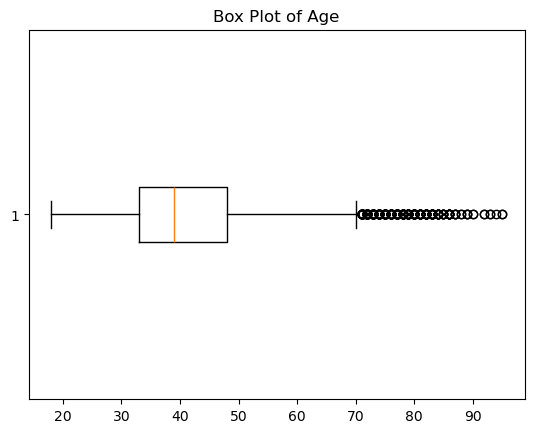

In [453]:
plt.boxplot(df['age'], vert=False)
plt.title('Box Plot of Age')
plt.show()

In [269]:
mean = df['age'].mean()
std = df['age'].std()   # calculates the summary statistics

lower_bound = mean - std*2
upper_bound = mean + std*2  # calculates the lower and upper bounds

print('Lower Bound :',lower_bound)
print('Upper Bound :',upper_bound)

Lower Bound : 19.698686132377507
Upper Bound : 62.173734296279235


In [271]:
df1 = df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)] #drops the outliers

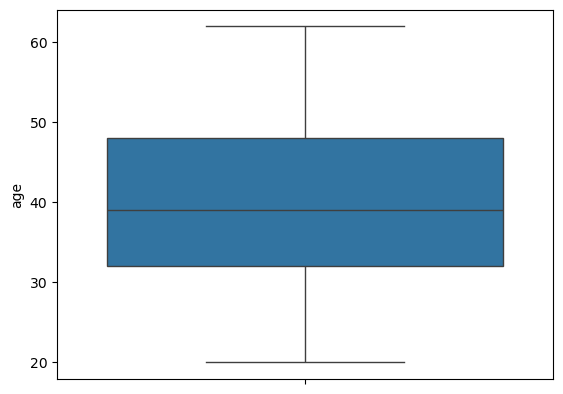

In [273]:
sns.boxplot(df1.age) # visualization after dropping the outliers
plt.show()

# Exploratory Data Analysis (EDA):

# Count Plot

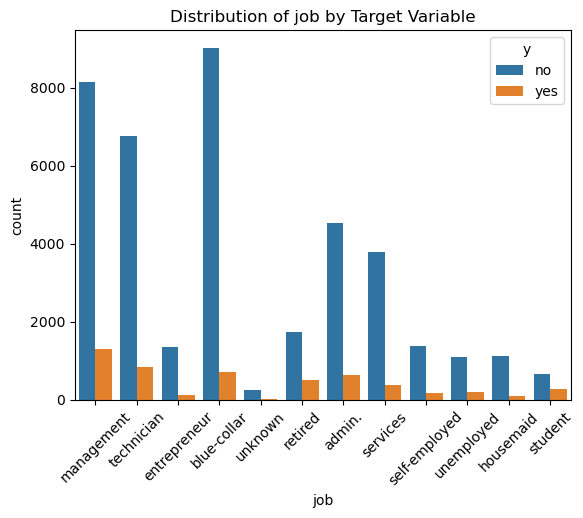

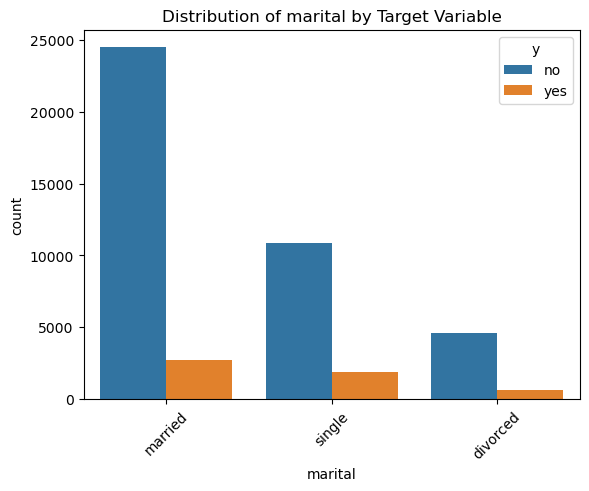

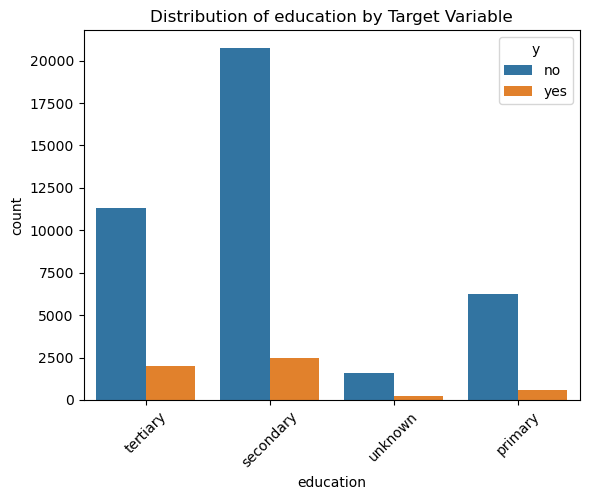

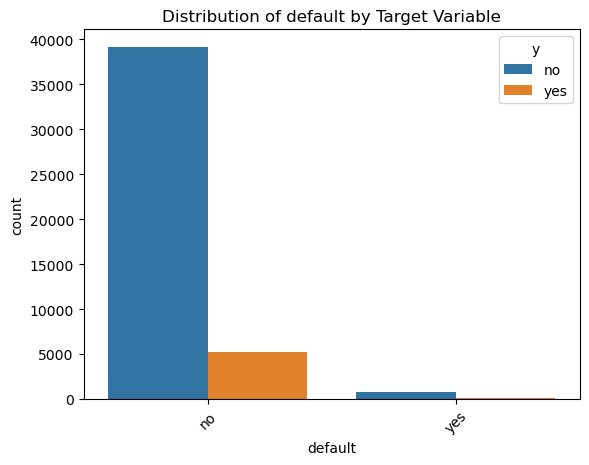

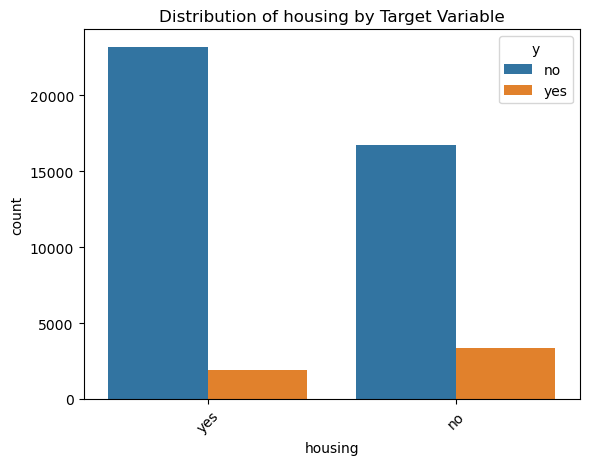

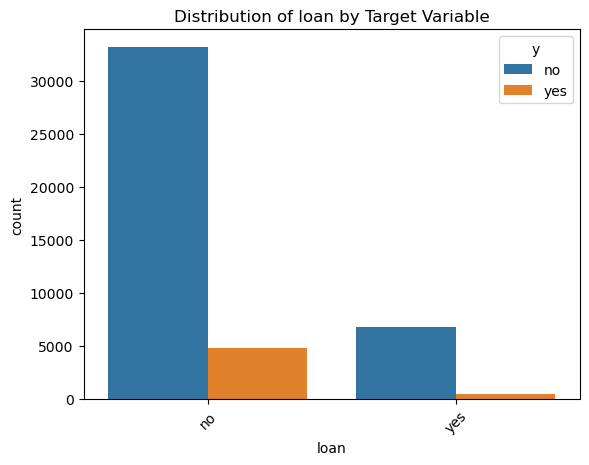

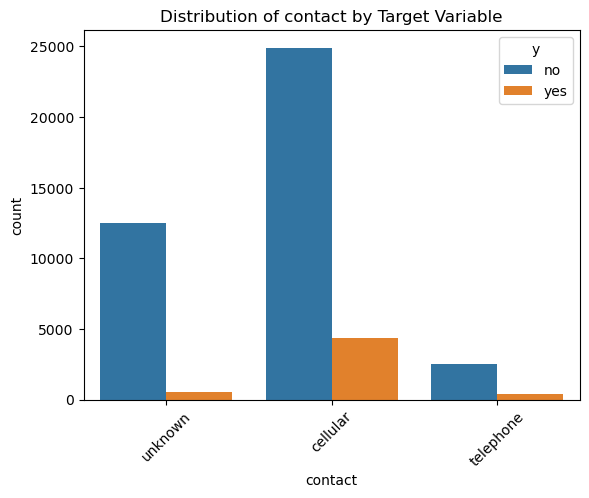

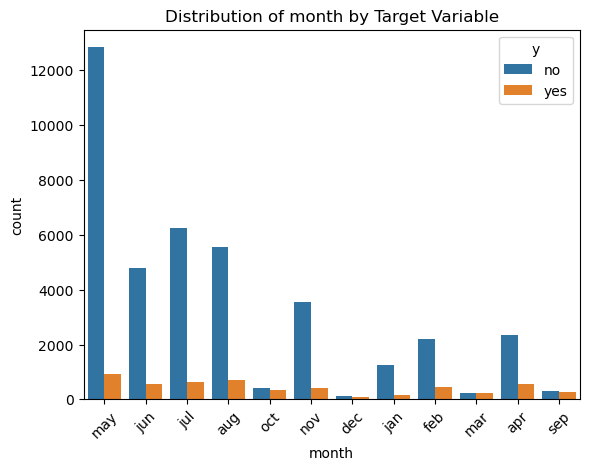

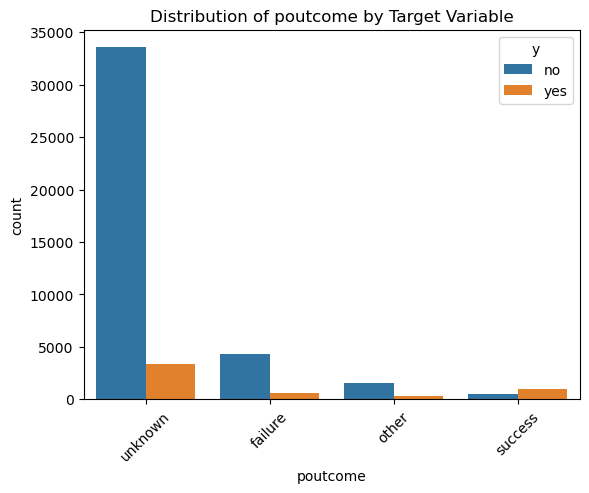

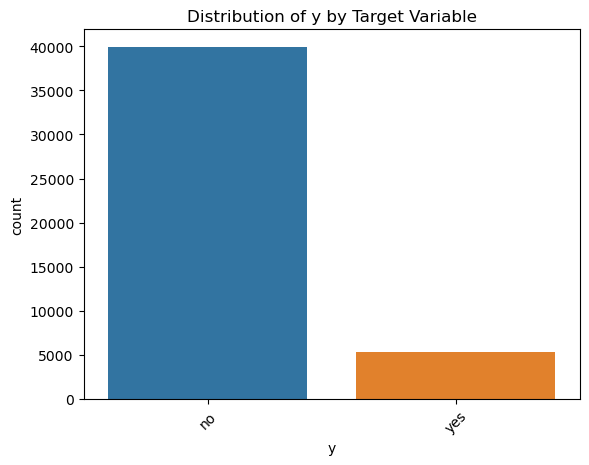

In [282]:
# Visualizing categorical columns:

for col in cat_col:
    sns.countplot(data=df, x=col, hue='y')
    plt.title(f'Distribution of {col} by Target Variable')
    plt.xticks(rotation=45)
    plt.show()

# Pie Chart

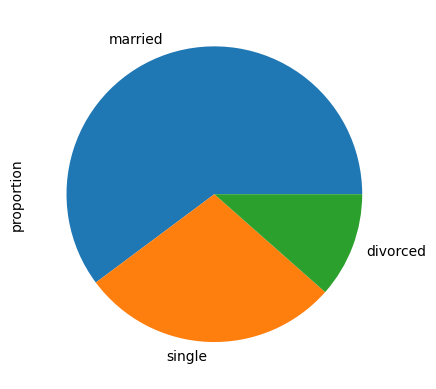

In [289]:
df.marital.value_counts(normalize=True)  # calculates the percentage of each marital category

df.marital.value_counts(normalize=True).plot.pie()  # plots the pie chart of marital categories
plt.show()

# Histograms

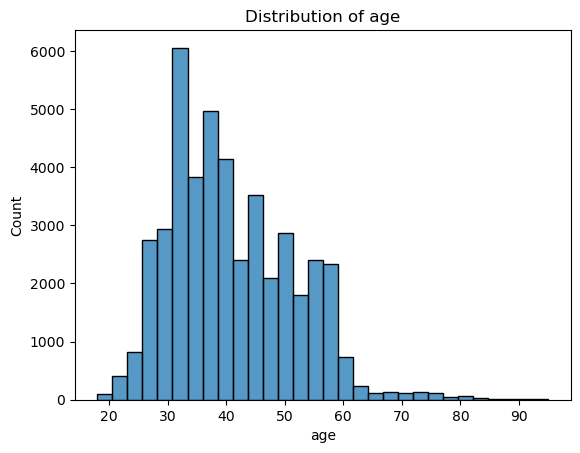

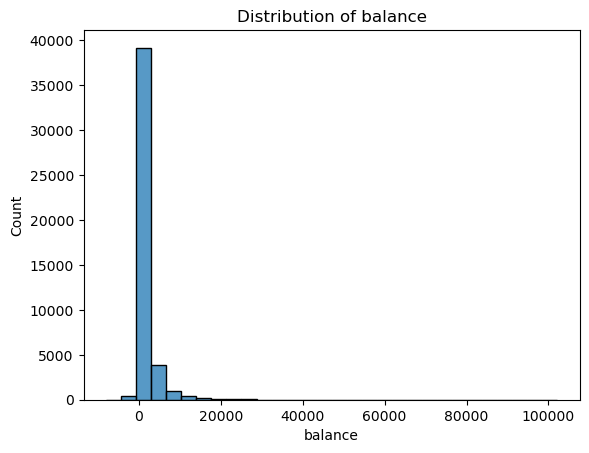

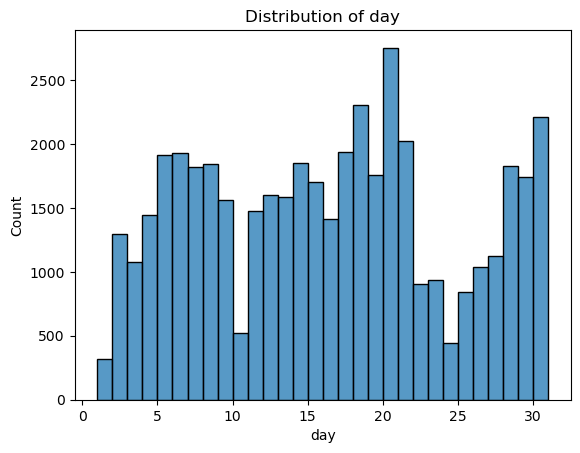

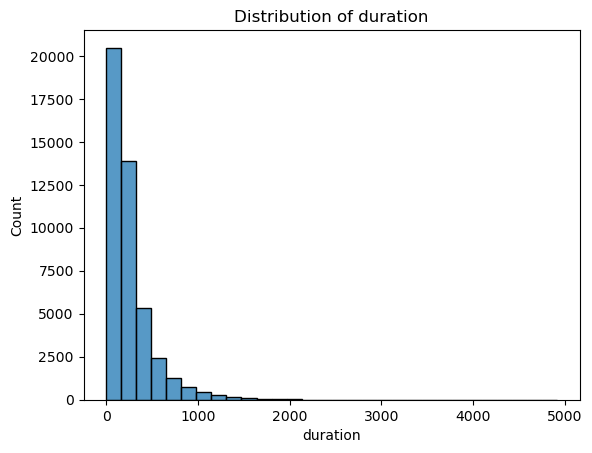

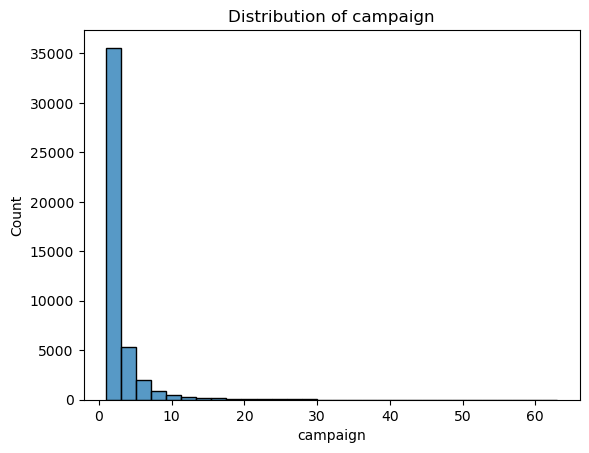

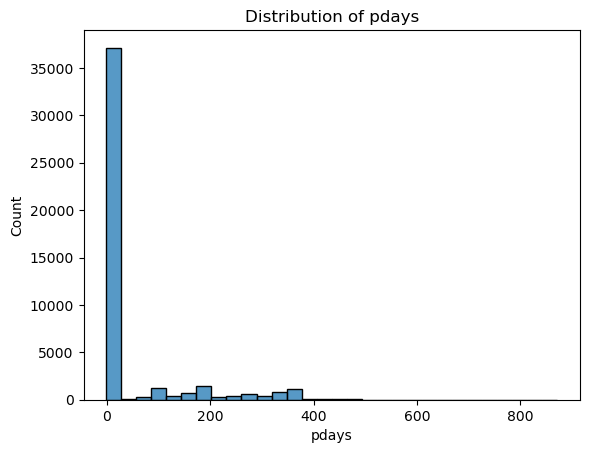

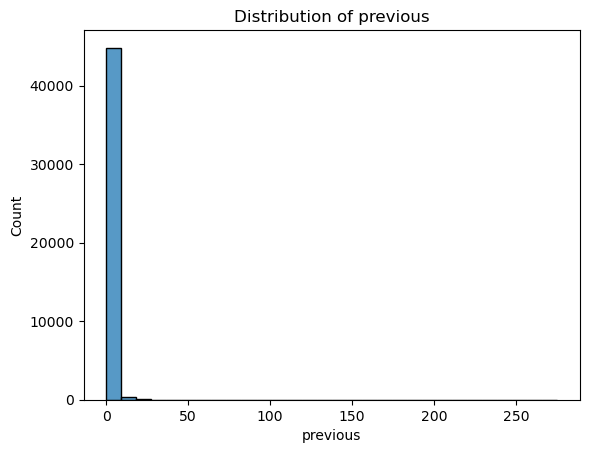

In [286]:
# Visualizing numerical columns:

for col in num_col:
    sns.histplot(df[col], bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

# Scatter Plot

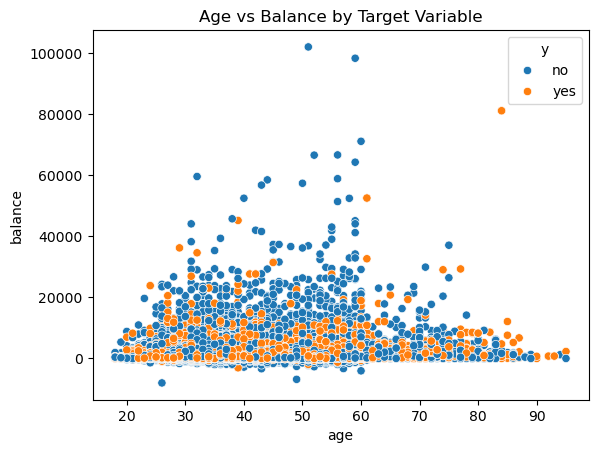

In [307]:
# Exploring the relationship between features:

sns.scatterplot(data=df, x='age', y='balance', hue='y')
plt.title('Age vs Balance by Target Variable')   # setting the title using Matplotlib
plt.show()

# Pair Plot

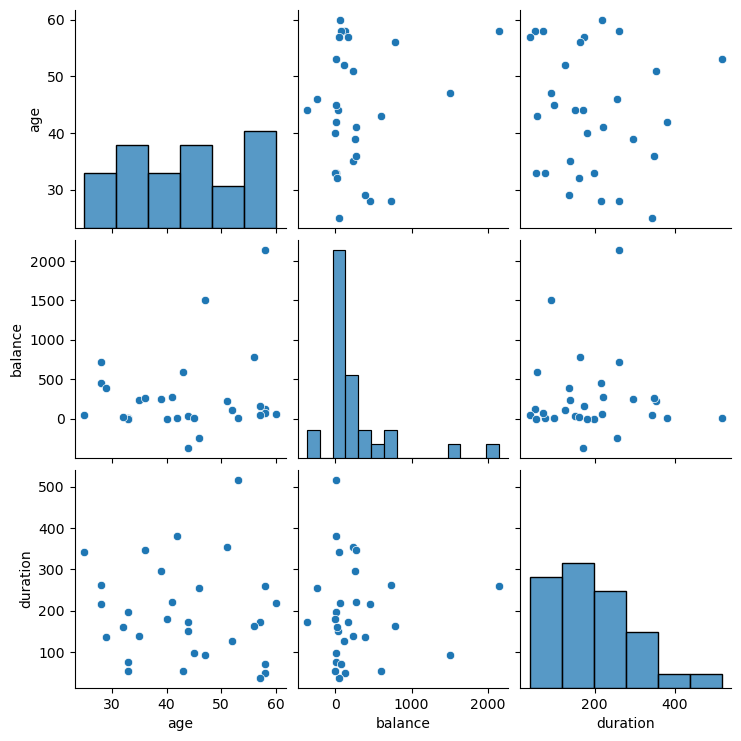

In [310]:
data=pd.read_csv('bank-full.csv', nrows=30)
sns.pairplot(data = data, vars=['age', 'balance', 'duration'])
plt.show()

# Correlation Matrix

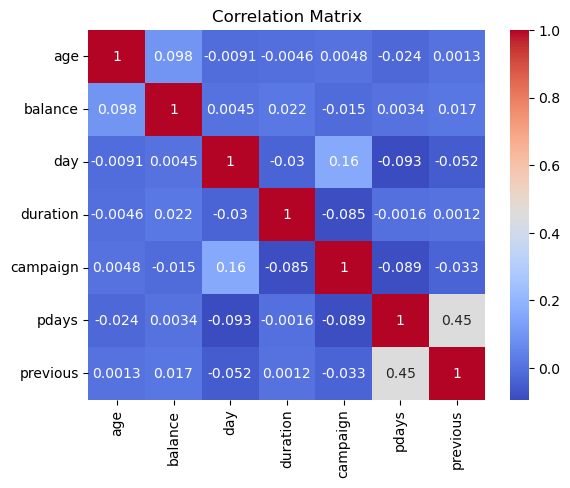

In [335]:
correlation_matrix = df[num_col].corr()    # correlation analysis of all numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')    # setting the title using Matplotlib
plt.show()


# Predictive Model:

# Logistic Regression

In [455]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Selecting features and target variable
X = data[['age', 'balance', 'duration', 'campaign']]  # Example feature columns
y = data['y'].map({'yes': 1, 'no': 0})  # Converting target variable to binary

# Spliting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optional: Scaling the features (important for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating and fiting the logistic regression model
model = LogisticRegression(solver='liblinear')  # Using 'liblinear' for binary classification
model.fit(X_train_scaled, y_train)

# Making predictions
y_pred = model.predict(X_test_scaled)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Printing the results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.89
Confusion Matrix:
[[7822  130]
 [ 902  189]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.59      0.17      0.27      1091

    accuracy                           0.89      9043
   macro avg       0.74      0.58      0.60      9043
weighted avg       0.86      0.89      0.86      9043



# Model Evaluation:

# Cross-Validation

In [406]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X, y, cv=5)
print('Cross-Validation Scores:', cv_scores)
print('Mean CV Score:', cv_scores.mean())

Cross-Validation Scores: [0.9050094  0.89559832 0.88652953 0.86916611 0.87569122]
Mean CV Score: 0.8863989159610808


# Model Comparison (optional):

# Random Forest

In [420]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print('Random Forest Accuracy:', accuracy_score(y_test, rf_pred))
print('Random Forest Classification Report:\n', classification_report(y_test, rf_pred))

Random Forest Accuracy: 0.8789118655313503
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.93      7952
           1       0.50      0.24      0.32      1091

    accuracy                           0.88      9043
   macro avg       0.70      0.60      0.63      9043
weighted avg       0.85      0.88      0.86      9043



# Decision Tree

In [426]:
from sklearn.tree import DecisionTreeClassifier

# Model Selection and Training (Decision Tree)
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Model Evaluation
dt_y_pred = dt_model.predict(X_test)
print('Decision Tree Accuracy:', accuracy_score(y_test, dt_y_pred))
print('Decision Tree Classification Report:\n', classification_report(y_test, dt_y_pred))
print('Decision Tree Confusion Matrix:\n', confusion_matrix(y_test, dt_y_pred))

Decision Tree Accuracy: 0.8339046776512219
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.91      7952
           1       0.32      0.34      0.33      1091

    accuracy                           0.83      9043
   macro avg       0.61      0.62      0.62      9043
weighted avg       0.84      0.83      0.84      9043

Decision Tree Confusion Matrix:
 [[7172  780]
 [ 722  369]]


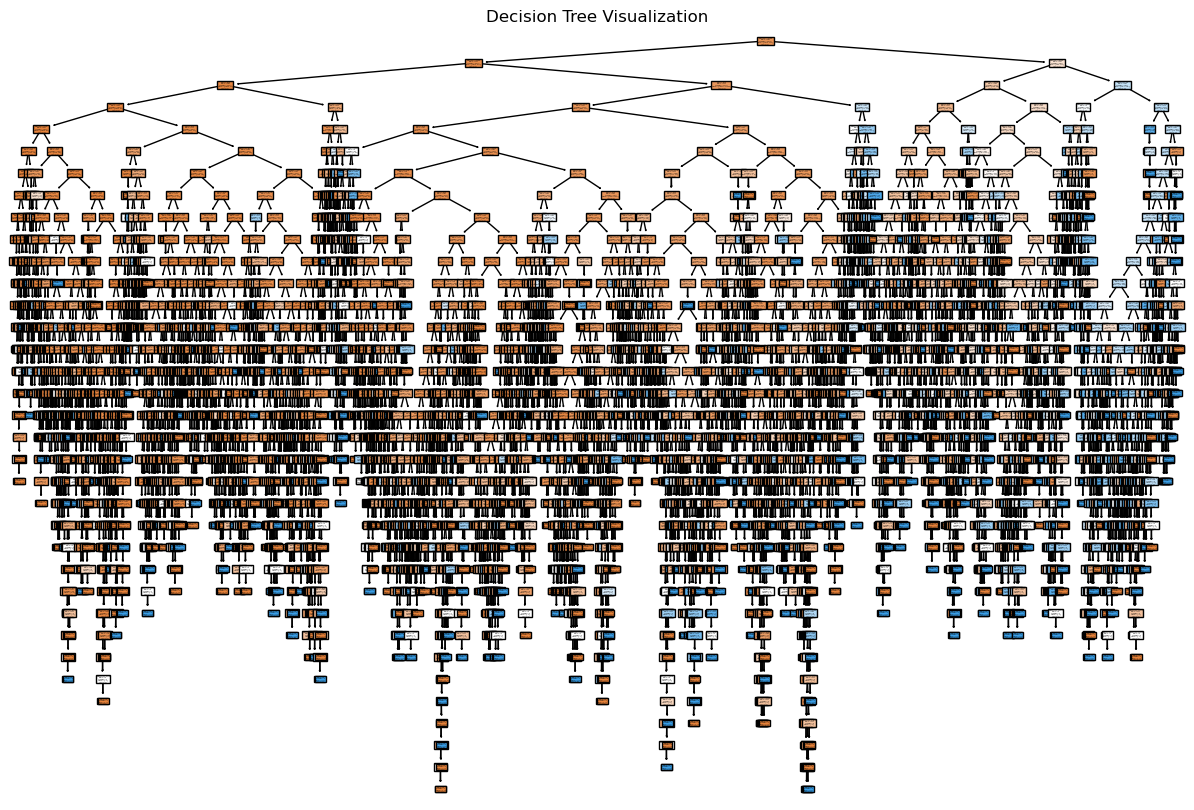

In [429]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15, 10))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.title('Decision Tree Visualization')
plt.show()

# (THE END)